In [73]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [74]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style

In [75]:
data=pd.read_excel('sample.xlsx') 
idea=data.iloc[:,0:1] #Selecting the first column that has text. 
#Converting the column of data from excel sheet into a list of documents, where each document corresponds to a group of sentences.
corpus=[]
for index,row in idea.iterrows():
    corpus.append(row['compile_error'])

corpus = [str(item).replace(" ","-") for item in corpus]

In [76]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus) #ERROR AFTER EXECUTING THESE #LINES
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )   

(17745, 2954)


For n_clusters = 2 The average silhouette_score is : 0.15349739869618603
For n_clusters = 3 The average silhouette_score is : 0.23574861886901877
For n_clusters = 4 The average silhouette_score is : 0.2831591765784336
For n_clusters = 5 The average silhouette_score is : 0.2970378706127761
For n_clusters = 6 The average silhouette_score is : 0.31756304939997926
For n_clusters = 7 The average silhouette_score is : 0.32032741395046144
For n_clusters = 8 The average silhouette_score is : 0.3295749403854817
For n_clusters = 9 The average silhouette_score is : 0.32778580595750506
For n_clusters = 10 The average silhouette_score is : 0.31559133009422274
For n_clusters = 11 The average silhouette_score is : 0.3210664159538176
For n_clusters = 12 The average silhouette_score is : 0.3340215510154539
For n_clusters = 13 The average silhouette_score is : 0.346801748625949
For n_clusters = 14 The average silhouette_score is : 0.3431833070627127
For n_clusters = 15 The average silhouette_score is : 

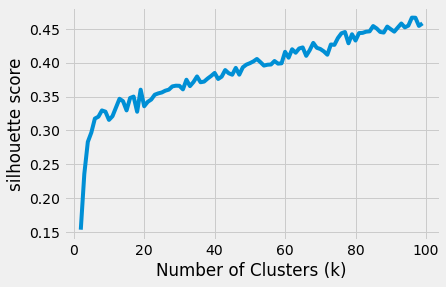

In [77]:
range_n_clusters = [x for x in range(2,100)]
silhouette_avg_n_clusters = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    # fig, (ax1) = plt.subplots(1, 1)
    # fig.set_size_inches(18, 7)

    # # The 1st subplot is the silhouette plot
    # # The silhouette coefficient can range from -1, 1 but in this example all
    # # lie within [-0.1, 1]
    # ax1.set_xlim([-0.1, 1])
    # # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # # plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, tfidf.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(tfidf)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(tfidf, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    # sample_silhouette_values = silhouette_samples(tfidf, cluster_labels)

    # y_lower = 10
    # for i in range(n_clusters):
    #     # Aggregate the silhouette scores for samples belonging to
    #     # cluster i, and sort them
    #     ith_cluster_silhouette_values = \
    #         sample_silhouette_values[cluster_labels == i]

    #     ith_cluster_silhouette_values.sort()

    #     size_cluster_i = ith_cluster_silhouette_values.shape[0]
    #     y_upper = y_lower + size_cluster_i

    #     color = cm.nipy_spectral(float(i) / n_clusters)
    #     ax1.fill_betweenx(np.arange(y_lower, y_upper),
    #                       0, ith_cluster_silhouette_values,
    #                       facecolor=color, edgecolor=color, alpha=0.7)

    #     # Label the silhouette plots with their cluster numbers at the middle
    #     ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    #     # Compute the new y_lower for next plot
    #     y_lower = y_upper + 10  # 10 for the 0 samples

    # ax1.set_title("The silhouette plot for the various clusters.")
    # ax1.set_xlabel("The silhouette coefficient values")
    # ax1.set_ylabel("Cluster label")

    # # The vertical line for average silhouette score of all the values
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # ax1.set_yticks([])  # Clear the yaxis labels / ticks
    # ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #               "with n_clusters = %d" % n_clusters),
    #              fontsize=14, fontweight='bold')

# plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()


In [78]:
num_clusters = 10 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit_predict(tfidf)
clusters = km.labels_.tolist()

idea={'Idea':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.
frame.to_csv("clusters.csv") 

In [79]:
print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc belonging `#to each cluster.`




                                                 Idea  Cluster
9   -cannot-find-symbol-symbol:---variable-Pair-lo...        9
9   -cannot-find-symbol-symbol:---variable-Pair-lo...        9
9   -cannot-find-symbol-symbol:---variable-Quad-lo...        9
9   -cannot-find-symbol-symbol:---variable-Quad-lo...        9
9   -cannot-find-symbol-symbol:---variable-Quint-l...        9
..                                                ...      ...
9                         void-cannot-be-dereferenced        9
9                         void-cannot-be-dereferenced        9
9                         void-cannot-be-dereferenced        9
9                         void-cannot-be-dereferenced        9
9                         void-cannot-be-dereferenced        9

[17745 rows x 2 columns]


9    4121
0    3436
2    2633
3    2434
4    1320
1    1214
6    1209
7     709
5     499
8     170
Name: Cluster, dtype: int64
